In [1]:
# Deep Learning

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

11490434/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, '0')

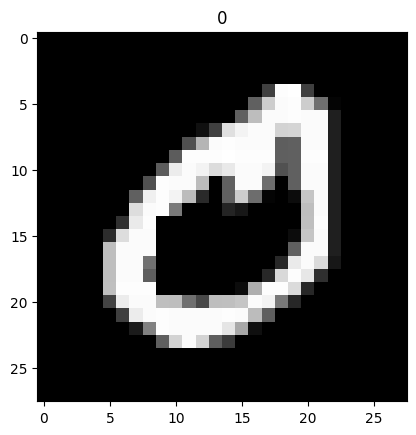

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [9]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4586 - accuracy: 0.8608 - val_loss: 0.1992 - val_accuracy: 0.9428
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9327 - val_loss: 0.1337 - val_accuracy: 0.9611
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1886 - accuracy: 0.9454 - val_loss: 0.1078 - val_accuracy: 0.9679
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1665 - accuracy: 0.9509 - val_loss: 0.1037 - val_accuracy: 0.9693
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1579 - accuracy: 0.9537 - val_loss: 0.1073 - val_accuracy: 0.9702
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1414 - accuracy: 0.9588 - val_loss: 0.0981 - val_accuracy: 0.9711
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1342 - accuracy: 0.9607 - val_loss: 0.0981 - val_accuracy:

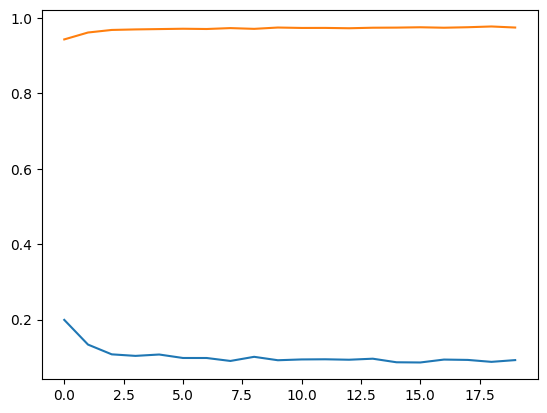

In [11]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [12]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

313/313 [==============================] - 1s 1ms/step


array([[9.20462984e-10, 1.53166813e-08, 5.42251928e-06, ...,
        9.99908805e-01, 6.24212904e-09, 6.07231123e-05],
       [1.01403214e-06, 1.58654846e-04, 9.99241829e-01, ...,
        3.02091976e-05, 2.96940707e-04, 1.15571488e-07],
       [3.17202449e-12, 9.99991536e-01, 6.75742342e-08, ...,
        1.96694623e-06, 4.89095692e-06, 1.80621775e-08],
       ...,
       [9.48337658e-11, 3.31866872e-08, 4.99740294e-09, ...,
        1.25096761e-07, 2.17859480e-07, 9.67799642e-05],
       [1.03924747e-17, 4.71019905e-19, 3.85226315e-20, ...,
        1.70504700e-14, 9.76121874e-12, 1.68222519e-10],
       [5.74275916e-08, 1.08472445e-14, 3.99360623e-12, ...,
        2.80991004e-17, 2.76827521e-08, 3.70501575e-17]], dtype=float32)

In [13]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    0,    1,    0,    0,    0,    1,    3,    3,    1],
       [   0, 1120,    5,    0,    0,    2,    1,    1,    5,    1],
       [   3,    0, 1003,    6,    1,    0,    2,   10,    7,    0],
       [   1,    0,    2,  987,    0,    5,    0,    6,    4,    5],
       [   2,    0,    1,    0,  947,    0,    5,    4,    2,   21],
       [   3,    0,    1,   11,    1,  863,    3,    1,    4,    5],
       [   9,    3,    0,    0,    3,    7,  933,    0,    3,    0],
       [   1,    2,    8,    0,    0,    0,    0, 1008,    3,    6],
       [   6,    0,    2,    4,    5,    6,    2,    6,  940,    3],
       [   2,    2,    1,    8,   10,    2,    0,   11,    2,  971]],
      dtype=int64)

In [14]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 22ms/step


[4]